<a href="https://colab.research.google.com/github/jear2412/MCMC/blob/master/PT-HMC-SIRblackplague.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

sns.set()


In [62]:
def Analysis(x):
    var=np.var(x,0)

    ess=np.zeros( x.shape[1])
    for i in range( x.shape[1] ):
      ess[i]=tfp.mcmc.effective_sample_size(  x[:,i] , filter_beyond_positive_pairs=True)
    
    mess=np.min(ess)
    N=x.shape[0]
    summary= {
        "TotalObs": N,
        "Variance": var,
        "mVar": var/ess,
        "ess": ess,
        "mess":mess, #min ess
        "IAT": N/ess, 
        }
    return summary

In [ ]:
#Databases

SIRdE=pd.read_csv('SIRdE.csv')
SIRdex=pd.read_csv('SIRdex.csv')
SIRdms=pd.read_csv('SIRdms.csv')
SIRobs=pd.read_csv('SIRobs.csv')


In [ ]:
pd.DataFrame.describe(SIRobs)


,Unnamed: 0,alpha,beta,I0,E,lp__
count,74999.000000,74999.000000,74999.000000,74999.000000,74999.000000,74999.000000
mean,37501.000000,0.013803,0.000692,9.700673,548.556866,-561.908775
std,21650.490757,0.000301,0.000027,0.278878,1.370188,1.278740
min,2.000000,0.012592,0.000600,7.176136,546.628095,-575.045042
25%,18751.500000,0.013600,0.000674,9.577720,547.554828,-562.484466
50%,37501.000000,0.013796,0.000691,9.781057,548.245758,-561.574602
75%,56250.500000,0.013999,0.000709,9.906874,549.219892,-560.972332
max,75000.000000,0.015180,0.000822,9.999997,559.191867,-560.351814


In [ ]:
pd.DataFrame.median(SIRobs)


Unnamed: 0    37500.500000
alpha             0.013796
beta              0.000691
I0                9.781056
E               548.245768
lp__           -561.574585
dtype: float64

In [ ]:
pd.DataFrame.quantile(SIRobs, (0.025, 0.975))

,Unnamed: 0,alpha,beta,I0,E,lp__
0.025,1875.975,0.013226,0.000643,8.958332,546.851886,-565.257995
0.975,73125.025,0.014412,0.000748,9.992176,552.036841,-560.462133


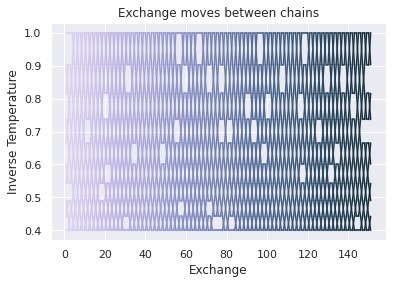

In [ ]:
ax=sns.lineplot(x="x", y="y", hue="g",data=SIRdex, legend=False,  palette="ch:2.5,.25") 
ax.set(xlabel="Exchange", ylabel = "Inverse Temperature")
ax.set_title('Exchange moves between chains')
plt.savefig('PTSIR1.png', dpi=500)

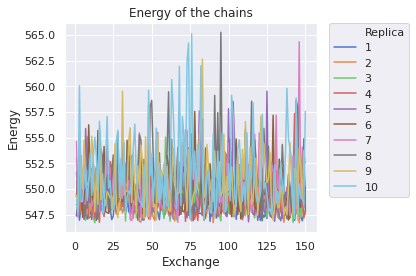

In [67]:
ax=sns.lineplot(x="Exchange", y="E", hue="Replica", data=SIRdE, legend="full",  palette="muted")
ax.set(xlabel="Exchange", ylabel = "Energy")
ax.set_title('Energy of the chains')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('PTSIR2.png', dpi=450)

In [46]:
alpha= SIRobs['alpha']
beta= SIRobs['beta']
I0= SIRobs['I0']

In [63]:
results=SIRobs[[ 'alpha','beta','I0'  ]]
Analysis( pd.DataFrame.to_numpy(results) )


{'IAT': array([2.60693071, 2.82592361, 2.04085031]),
 'TotalObs': 75000,
 'Variance': array([9.05530503e-08, 7.02826844e-10, 7.77718624e-02]),
 'ess': array([28769.46435151, 26539.99554359, 36749.38804559]),
 'mVar': array([3.14754036e-12, 2.64817996e-14, 2.11627639e-06]),
 'mess': 26539.995543590758}